In [3]:
import pandas as pd
import seaborn as sns


In [4]:
data = pd.read_csv("googleplaystore.csv")


#   general info over data

In [5]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [7]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [8]:
data.shape

(10841, 13)

In [9]:
data.info

<bound method DataFrame.info of                                                      App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE

#   data cleaning

In [10]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [11]:
data.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [12]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [13]:
df2 = data.drop(["Current Ver", "Android Ver"], axis=1)
df2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018"


In [14]:
#       !!! REMOVE DUPLICATED APPS

print(df2.shape)
df2.drop_duplicates(subset=["App"], inplace=True)
print(df2.shape)


(10841, 11)
(9660, 11)


In [15]:
df2[(df2["Installs"] == "Free")]
df2.drop(df2[(df2["Installs"] == "Free")].index, axis=0, inplace=True)

In [16]:
df2.drop(df2[(df2["Installs"] == "0")].index, axis=0, inplace=True)

In [17]:
df2.Installs.unique()
def remove_plus(x):
    x = x.replace(",", "")
    return int(x[:-1])

df3 = df2.copy()
df3.Installs = df2.Installs.apply(remove_plus)
df3.Installs

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 9658, dtype: int64

In [18]:
df3.Price.unique()
def remove_dollar(x):
    x = x.replace("$", "")
    return float(x)
df4 = df3.copy()
df4.Price = df4.Price.apply(remove_dollar)


df4.groupby("Type").Price.sum()
df4.sort_values("Price", ascending=False)
df4.value_counts("Price").head(57)

Price
0.00      8902
0.99       145
2.99       124
1.99        73
4.99        70
3.99        57
1.49        46
5.99        26
2.49        25
9.99        19
399.99      12
6.99        11
4.49         9
14.99        9
7.99         7
3.49         7
6.49         5
8.99         5
19.99        5
29.99        5
5.49         5
12.99        4
2.00         3
1.00         3
11.99        3
24.99        3
10.99        2
8.49         2
16.99        2
7.49         2
17.99        2
1.70         2
13.99        2
39.99        2
10.00        2
46.99        1
109.99       1
394.99       1
389.99       1
14.00        1
1.26         1
15.46        1
15.99        1
379.99       1
299.99       1
200.00       1
154.99       1
18.99        1
74.99        1
19.40        1
19.90        1
1.20         1
89.99        1
25.99        1
28.99        1
79.99        1
30.99        1
Name: count, dtype: int64

In [19]:
df4["Content Rating"].unique()
df4.value_counts(["Content Rating"])

df4.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

#   date format

In [20]:

df4["Date"] = pd.to_datetime(df4["Last Updated"]).dt.strftime("%Y-%m-%d")
df4["Date"] = pd.to_datetime(df4["Date"])
df4.drop(["Last Updated"], axis=1, inplace=True)

In [21]:
df4.describe()

df4["Reviews"] = df4["Reviews"].map(lambda x: float(x))
df4.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                  float64
Size                      object
Installs                   int64
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Date              datetime64[ns]
dtype: object

#   removing columns that are not interesting

In [22]:
df4.columns
df5 = df4[["App", "Category", "Rating", "Reviews", "Installs", "Type", "Price", "Date"]]
print(df5.head())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

    Reviews  Installs  Type  Price       Date  
0     159.0     10000  Free    0.0 2018-01-07  
1     967.0    500000  Free    0.0 2018-01-15  
2   87510.0   5000000  Free    0.0 2018-08-01  
3  215644.0  50000000  Free    0.0 2018-06-08  
4     967.0    100000  Free    0.0 2018-06-20  


In [23]:
df5.isna().sum()

App            0
Category       0
Rating      1462
Reviews        0
Installs       0
Type           0
Price          0
Date           0
dtype: int64

#   filter data

In [24]:
#   at the end i leave the NA Rating values but i filter out the low download apps instead.. 
#df5[df5["Rating"].isna()]["Installs"].unique()

In [25]:
# here I assume, that Apps with no ratings are just too small / unpopular
#df6 = df5[~df5["Rating"].isna()]
#df6.isna().sum()

In [26]:
#   remove data with too few downloads
df5.value_counts("Installs")

Installs
1000000       1417
100000        1112
10000         1031
10000000       937
1000           888
100            710
5000000        607
500000         505
50000          469
5000           468
10             385
500            328
50             204
50000000       202
100000000      188
5               82
1               67
500000000       24
1000000000      20
0               14
Name: count, dtype: int64

In [27]:
df6 = df5[df5["Installs"]>=10000]

In [28]:
#   I would also filter the Apps with no or few reviews..
df6 = df6[df6["Reviews"]>50]

In [29]:
#   simplify date to year for simpler visualisation
df6["Date"] = df6["Date"].dt.strftime("%Y")

In [30]:

apps_free = df6[df6["Type"]=="Free"][["App", "Category", "Rating", "Reviews", "Installs", "Date"]]
apps_paid = df6[df6["Type"]=="Paid"][["App", "Category", "Rating", "Reviews", "Installs", "Price", "Date"]]


#   Statistical filtering

In [31]:
print(apps_paid.describe())

           Rating       Reviews      Installs       Price
count  270.000000  2.700000e+02  2.700000e+02  270.000000
mean     4.375556  2.429854e+04  2.105556e+05   14.189037
std      0.306307  1.493251e+05  8.871478e+05   60.876065
min      2.800000  5.200000e+01  1.000000e+04    0.990000
25%      4.200000  9.257500e+02  1.000000e+04    1.990000
50%      4.400000  2.975500e+03  5.000000e+04    2.990000
75%      4.600000  1.371500e+04  1.000000e+05    4.990000
max      4.900000  2.376564e+06  1.000000e+07  400.000000


In [32]:
# I take only apps that are not higher as average + 5x stdev
apps_paid = apps_paid[apps_paid["Price"]<=(apps_paid["Price"].mean()+5*apps_paid["Price"].mean())]
apps_paid["Price"].describe()

count    263.000000
mean       4.338783
std        4.022562
min        0.990000
25%        1.990000
50%        2.990000
75%        4.990000
max       29.990000
Name: Price, dtype: float64

In [33]:
apps_paid["Installs"].unique()

array([  100000,    10000,   500000,    50000, 10000000,  1000000],
      dtype=int64)

In [34]:
apps_paid[apps_paid["Installs"]==1000000]

,App,Category,Rating,Reviews,Installs,Price,Date
2242,Card Wars - Adventure Time,FAMILY,4.3,129603.0,1000000,2.99,2016
2883,Facetune - For Free,PHOTOGRAPHY,4.4,49553.0,1000000,5.99,2018
3403,Beautiful Widgets Pro,PERSONALIZATION,4.2,97890.0,1000000,2.49,2016
3405,HD Widgets,PERSONALIZATION,4.3,58617.0,1000000,0.99,2016
4260,Cut the Rope GOLD,FAMILY,4.6,61264.0,1000000,0.99,2018
4842,Zombie Avengers:(Dreamsky)Stickman War Z,GAME,4.3,13604.0,1000000,0.99,2018
5490,True Skate,SPORTS,4.4,129409.0,1000000,1.99,2018
5578,Sleep as Android Unlock,LIFESTYLE,4.5,23966.0,1000000,5.99,2018
5631,Five Nights at Freddy's,GAME,4.6,100805.0,1000000,2.99,2014
6675,Infinity Dungeon VIP,FAMILY,4.3,21804.0,1000000,0.99,2018


In [35]:

apps_paid = apps_paid[apps_paid["Installs"]<10000000]
apps_paid.sort_values("Installs", ascending=False).head(5)

,App,Category,Rating,Reviews,Installs,Price,Date
5578,Sleep as Android Unlock,LIFESTYLE,4.5,23966.0,1000000,5.99,2018
4260,Cut the Rope GOLD,FAMILY,4.6,61264.0,1000000,0.99,2018
6675,Infinity Dungeon VIP,FAMILY,4.3,21804.0,1000000,0.99,2018
7355,Threema,COMMUNICATION,4.5,51110.0,1000000,2.99,2018
3403,Beautiful Widgets Pro,PERSONALIZATION,4.2,97890.0,1000000,2.49,2016


In [36]:
apps_free.describe()

,Rating,Reviews,Installs
count,6054.000000,6.100000e+03,6.100000e+03
mean,4.174298,3.418710e+05,1.230487e+07
std,0.436494,2.295028e+06,6.723598e+07
min,1.600000,5.100000e+01,1.000000e+04
25%,4.000000,1.056250e+03,1.000000e+05
50%,4.300000,1.211600e+04,1.000000e+06
75%,4.500000,8.695725e+04,5.000000e+06
max,4.900000,7.815831e+07,1.000000e+09


In [37]:
apps_free.max()

App         🔥 Football Wallpapers 4K | Full HD Backgrounds 😍
Category                                             WEATHER
Rating                                                   4.9
Reviews                                           78158306.0
Installs                                          1000000000
Date                                                    2018
dtype: object

In [38]:
#   random queries on data

df6["Installs"].unique()
df6.groupby("Installs").count()[["App"]]
df6[df6["Type"]=="Paid"].sort_values(by="Price")




,App,Category,Rating,Reviews,Installs,Type,Price,Date
4621,Jurassic Life: T Rex Simulator,FAMILY,4.2,1088.0,10000,Paid,0.99,2014
10035,Deus Ex GO,FAMILY,4.5,9699.0,100000,Paid,0.99,2018
9876,EU Flags Live Wallpaper,PERSONALIZATION,4.3,444.0,10000,Paid,0.99,2013
9541,El Chavo,FAMILY,4.0,751.0,10000,Paid,0.99,2014
3405,HD Widgets,PERSONALIZATION,4.3,58617.0,1000000,Paid,0.99,2016
...,...,...,...,...,...,...,...,...
5356,I Am Rich Premium,FINANCE,4.1,1867.0,50000,Paid,399.99,2017
5354,I am Rich Plus,FAMILY,4.0,856.0,10000,Paid,399.99,2018
4362,💎 I'm rich,LIFESTYLE,3.8,718.0,10000,Paid,399.99,2018
5351,I am rich,LIFESTYLE,3.8,3547.0,100000,Paid,399.99,2018


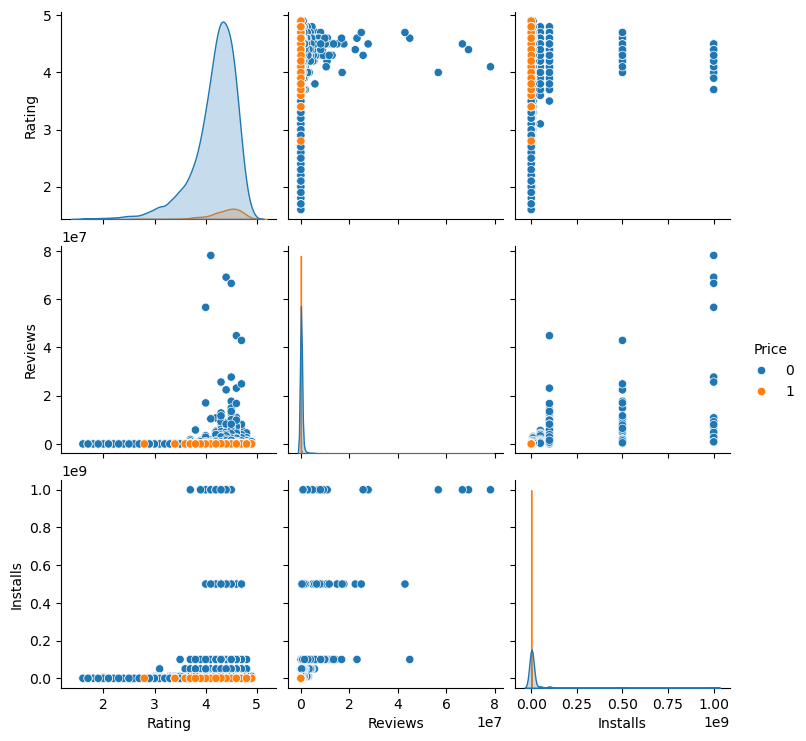

In [114]:
apps_all = pd.concat([apps_free, apps_paid], axis=0)

apps_all["Price"] = apps_all["Price"].apply(lambda x: 1 if x > 0 else 0)
sns.pairplot(apps_all, hue="Price")

#   Visualisation

In [ ]:
apps_free.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Installs', 'Date'], dtype='object')

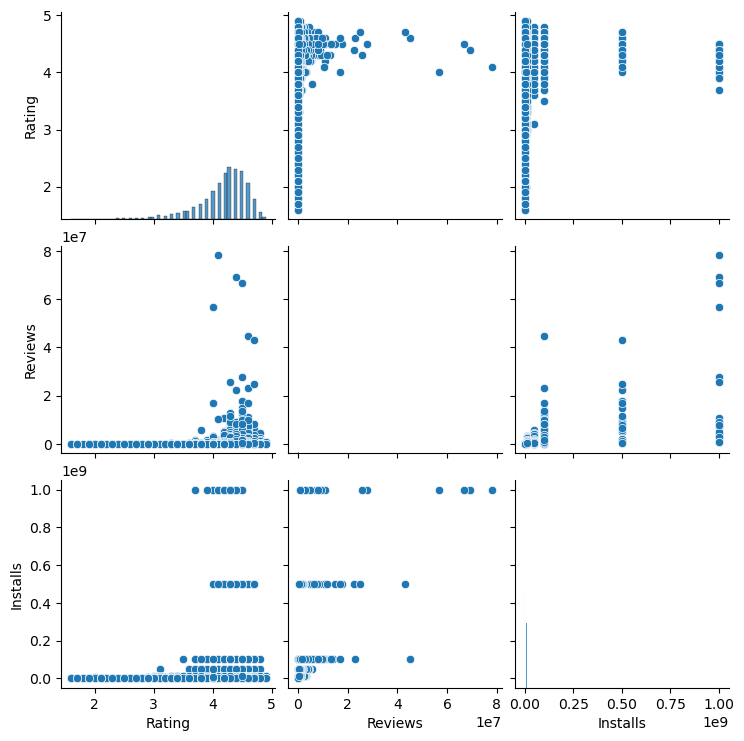

In [ ]:
sns.pairplot(apps_free)

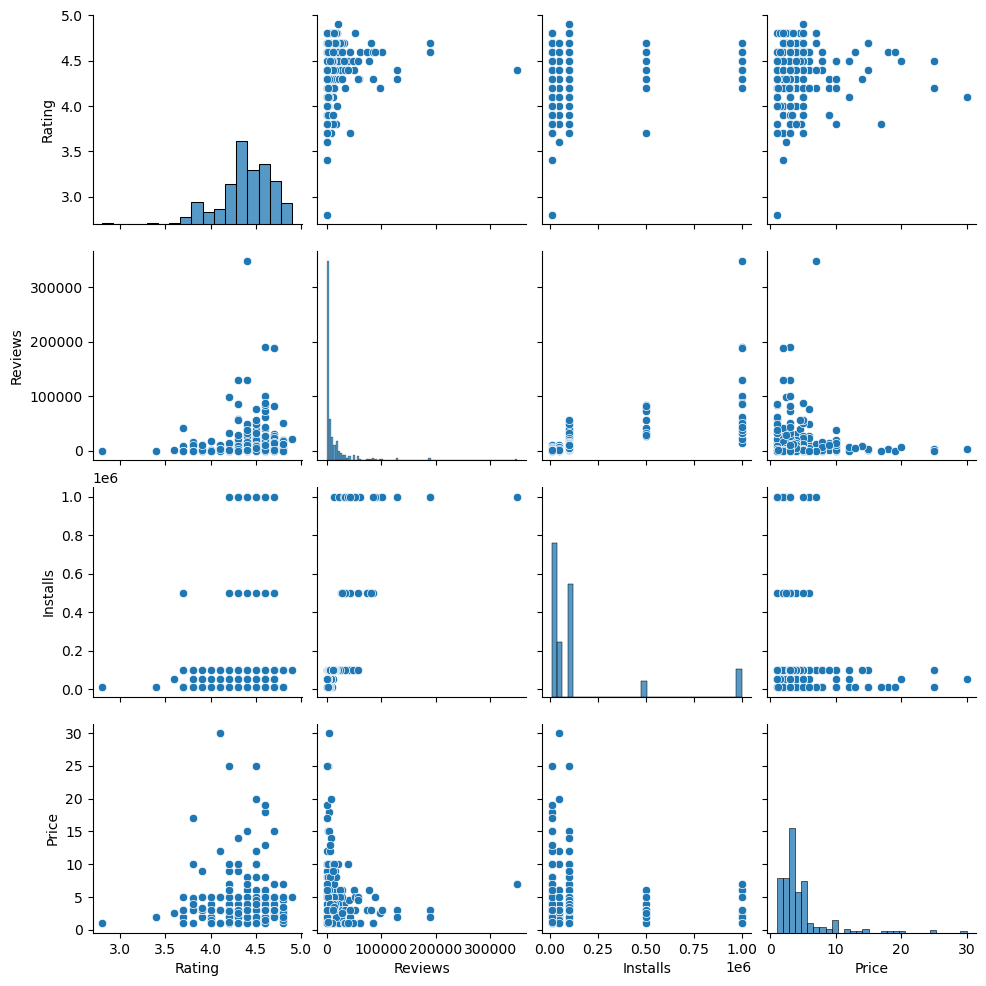

In [ ]:
sns.pairplot(apps_paid)

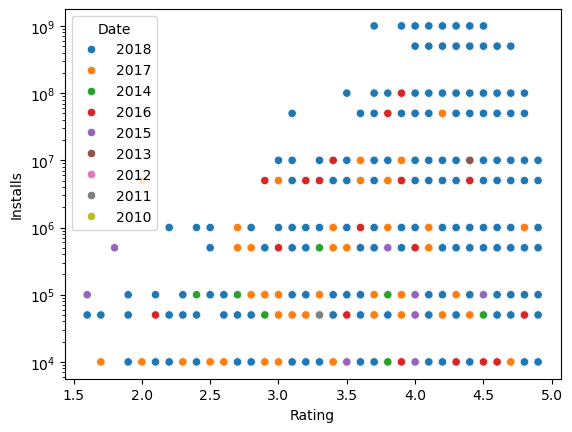

In [ ]:
import matplotlib.pyplot as plt
 
sns.scatterplot(data=apps_free, x="Rating", y="Installs", hue="Date")
 
# convert y-axis to Logarithmic scale
plt.yscale("log")

<Axes: xlabel='Date', ylabel='Installs'>

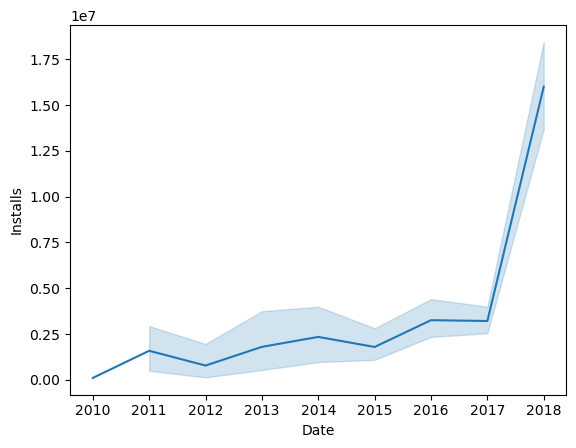

In [95]:
sns.lineplot(data=apps_free.sort_values(by="Date", ascending=True), x="Date", y="Installs")

<Axes: xlabel='Price', ylabel='Count'>

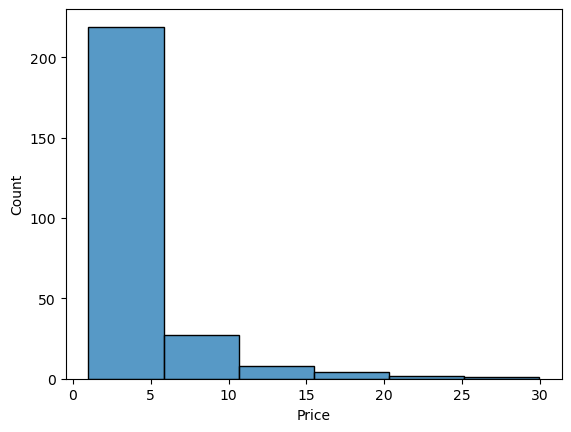

In [ ]:
sns.histplot(data=apps_paid[apps_paid["Price"]<100], x="Price", binwidth=5)

C:\Users\V. Stasiunaitis\AppData\Local\Temp\ipykernel_9996\177219592.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(apps_all["Rating"])


<Axes: xlabel='Rating', ylabel='Density'>

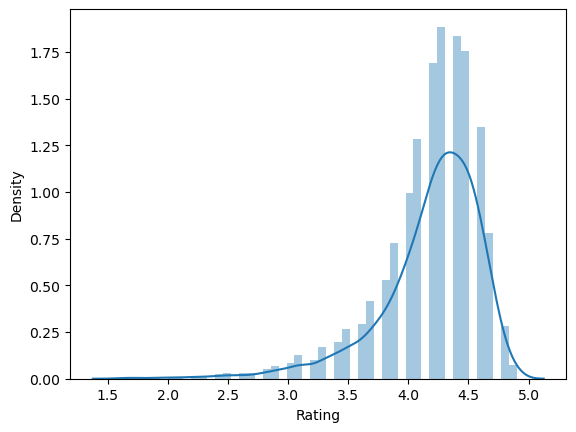

In [87]:
sns.distplot(apps_all["Rating"])

####### Revise this

#   ML

In [ ]:
#   additionally drop all apps without Ratings.. 1st for ML, 2nd, long overdo

apps_all.drop(["App", "Category"], axis=1, inplace=True)

apps_all.dropna(inplace=True)

X = apps_all.drop("Price", axis=1)
y = apps_all.Price
X.shape

(6361, 5)
Rating      46
Reviews      0
Installs     0
Date         0
Price        0
dtype: int64
Rating      0
Reviews     0
Installs    0
Date        0
Price       0
dtype: int64
(6315, 5)


(6315, 4)

In [117]:
y.shape

(6315,)

In [118]:
X.head()

,Rating,Reviews,Installs,Date
0,4.1,159.0,10000,2018
1,3.9,967.0,500000,2018
2,4.7,87510.0,5000000,2018
3,4.5,215644.0,50000000,2018
4,4.3,967.0,100000,2018


In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn import pipeline
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#   Plan:

#   1. scaler
#   1.5 svc
#   2. grid,
#   3.A SVC
#   3.B LR
#   3.C pipeline: pca, svc

#   vgl. SVC, PCA-SVC, LR

In [119]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

#print(scaled_X)
#print(scaled_X.shape)


X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.33, random_state=42)

In [122]:
svc = SVC()
svc.fit(X_train, y_train)
predictions = svc.predict(X_test)

print(f"Accuracy of SVC: \n{accuracy_score(y_test, predictions)}\n")
print(f"Matrix of SVC: \n{confusion_matrix(y_test, predictions)}\n")
print(f"Report of SVC: \n{classification_report(y_test, predictions)}\n")

Accuracy of SVC: 
0.9577735124760077

Matrix of SVC: 
[[1996    0]
 [  88    0]]

Report of SVC: 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1996
           1       0.00      0.00      0.00        88

    accuracy                           0.96      2084
   macro avg       0.48      0.50      0.49      2084
weighted avg       0.92      0.96      0.94      2084




c:\Users\V. Stasiunaitis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\V. Stasiunaitis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\V. Stasiunaitis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [126]:
params = {"C": [10, 100], "gamma": [0.1, 0.01]}
grid = GridSearchCV(SVC(), params, refit=True, verbose=2)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ....................................C=10, gamma=0.1; total time=   0.0s
[CV] END ....................................C=10, gamma=0.1; total time=   0.0s
[CV] END ....................................C=10, gamma=0.1; total time=   0.0s
[CV] END ....................................C=10, gamma=0.1; total time=   0.0s
[CV] END ....................................C=10, gamma=0.1; total time=   0.0s
[CV] END ...................................C=10, gamma=0.01; total time=   0.0s
[CV] END ...................................C=10, gamma=0.01; total time=   0.0s
[CV] END ...................................C=10, gamma=0.01; total time=   0.0s
[CV] END ...................................C=10, gamma=0.01; total time=   0.0s
[CV] END ...................................C=10, gamma=0.01; total time=   0.0s
[CV] END ...................................C=100, gamma=0.1; total time=   0.2s
[CV] END ...................................C=100

GridSearchCV(estimator=SVC(), param_grid={'C': [10, 100], 'gamma': [0.1, 0.01]},
             verbose=2)

In [127]:
grid.best_params_

{'C': 10, 'gamma': 0.1}

In [129]:
grid_predictions = grid.predict(X_test)

print(f"Accuracy of grid + SVC: \n{accuracy_score(y_test, grid_predictions)}\n")
print(f"Matrix of grid + SVC: \n{confusion_matrix(y_test, grid_predictions)}\n")
print(f"Report of grid + SVC: \n{classification_report(y_test, grid_predictions)}\n")

Accuracy of grid + SVC: 
0.9577735124760077

Matrix of grid + SVC: 
[[1996    0]
 [  88    0]]

Report of grid + SVC: 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1996
           1       0.00      0.00      0.00        88

    accuracy                           0.96      2084
   macro avg       0.48      0.50      0.49      2084
weighted avg       0.92      0.96      0.94      2084




c:\Users\V. Stasiunaitis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\V. Stasiunaitis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\V. Stasiunaitis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [138]:
pca = PCA(n_components=2)
pcaed_X = pca.fit_transform(scaled_X)

X_train, X_test, y_train, y_test = train_test_split(pcaed_X, y, test_size=0.33, random_state=42)

In [139]:
svc = SVC()
svc.fit(X_train, y_train)
predictions = svc.predict(X_test)

print(f"Accuracy of SVC: \n{accuracy_score(y_test, predictions)}\n")
print(f"Matrix of SVC: \n{confusion_matrix(y_test, predictions)}\n")
print(f"Report of SVC: \n{classification_report(y_test, predictions)}\n")

Accuracy of SVC: 
0.9577735124760077

Matrix of SVC: 
[[1996    0]
 [  88    0]]

Report of SVC: 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1996
           1       0.00      0.00      0.00        88

    accuracy                           0.96      2084
   macro avg       0.48      0.50      0.49      2084
weighted avg       0.92      0.96      0.94      2084




c:\Users\V. Stasiunaitis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\V. Stasiunaitis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\V. Stasiunaitis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#   The results are bad, but in general, i dont think it is possible to predict this label for computer, because there is realy almost no difference in the paid and free apps on the examened meassures

#   Over